In [3]:
# Importing the required packages
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
import pandas as pd
import os

In [8]:
def process_chunks(file_path):
    chunksize = 10 ** 6
    dtype_dict = {'date': 'str', 'serial_number': 'str', 'model': 'str', 'capacity_bytes': 'int32', 'failure': 'bool', 'datacenter': 'str', 'cluster_id': 'int8', 'vault_id': 'int16', 'pod_id': 'int16', 'pod_slot_num': 'float32', 'is_legacy_format': 'bool', 'smart_1_normalized': 'float64', 'smart_1_raw': 'float64', 'smart_2_normalized': 'float64', 'smart_2_raw': 'float64', 'smart_3_normalized': 'float64', 'smart_3_raw': 'float64', 'smart_4_normalized': 'float64', 'smart_4_raw': 'float64', 'smart_5_normalized': 'float64', 'smart_5_raw': 'float64', 'smart_7_normalized': 'float64', 'smart_7_raw': 'float64', 'smart_8_normalized': 'float64', 'smart_8_raw': 'float64', 'smart_9_normalized': 'float64', 'smart_9_raw': 'float64', 'smart_10_normalized': 'float64', 'smart_10_raw': 'float64', 'smart_11_normalized': 'float64', 'smart_11_raw': 'float64', 'smart_12_normalized': 'float64', 'smart_12_raw': 'float64', 'smart_13_normalized': 'float64', 'smart_13_raw': 'float64', 'smart_15_normalized': 'float64', 'smart_15_raw': 'float64', 'smart_16_normalized': 'float64', 'smart_16_raw': 'float64', 'smart_17_normalized': 'float64', 'smart_17_raw': 'float64', 'smart_18_normalized': 'float64', 'smart_18_raw': 'float64', 'smart_22_normalized': 'float64', 'smart_22_raw': 'float64', 'smart_23_normalized': 'float64', 'smart_23_raw': 'float64', 'smart_24_normalized': 'float64', 'smart_24_raw': 'float64', 'smart_27_normalized': 'float64', 'smart_27_raw': 'float64', 'smart_71_normalized': 'float64', 'smart_71_raw': 'float64', 'smart_82_normalized': 'float64', 'smart_82_raw': 'float64', 'smart_90_normalized': 'float64', 'smart_90_raw': 'float64', 'smart_160_normalized': 'float64', 'smart_160_raw': 'float64', 'smart_161_normalized': 'float64', 'smart_161_raw': 'float64', 'smart_163_normalized': 'float64', 'smart_163_raw': 'float64', 'smart_164_normalized': 'float64', 'smart_164_raw': 'float64', 'smart_165_normalized': 'float64', 'smart_165_raw': 'float64', 'smart_166_normalized': 'float64', 'smart_166_raw': 'float64', 'smart_167_normalized': 'float64', 'smart_167_raw': 'float64', 'smart_168_normalized': 'float64', 'smart_168_raw': 'float64', 'smart_169_normalized': 'float64', 'smart_169_raw': 'float64', 'smart_170_normalized': 'float64', 'smart_170_raw': 'float64', 'smart_171_normalized': 'float64', 'smart_171_raw': 'float64', 'smart_172_normalized': 'float64', 'smart_172_raw': 'float64', 'smart_173_normalized': 'float64', 'smart_173_raw': 'float64', 'smart_174_normalized': 'float64', 'smart_174_raw': 'float64', 'smart_175_normalized': 'float64', 'smart_175_raw': 'float64', 'smart_176_normalized': 'float64', 'smart_176_raw': 'float64', 'smart_177_normalized': 'float64', 'smart_177_raw': 'float64', 'smart_178_normalized': 'float64', 'smart_178_raw': 'float64', 'smart_179_normalized': 'float64', 'smart_179_raw': 'float64', 'smart_180_normalized': 'float64', 'smart_180_raw': 'float64', 'smart_181_normalized': 'float64', 'smart_181_raw': 'float64', 'smart_182_normalized': 'float64', 'smart_182_raw': 'float64', 'smart_183_normalized': 'float64', 'smart_183_raw': 'float64', 'smart_184_normalized': 'float64', 'smart_184_raw': 'float64', 'smart_187_normalized': 'float64', 'smart_187_raw': 'float64', 'smart_188_normalized': 'float64', 'smart_188_raw': 'float64', 'smart_189_normalized': 'float64', 'smart_189_raw': 'float64', 'smart_190_normalized': 'float64', 'smart_190_raw': 'float64', 'smart_191_normalized': 'float64', 'smart_191_raw': 'float64', 'smart_192_normalized': 'float64', 'smart_192_raw': 'float64', 'smart_193_normalized': 'float64', 'smart_193_raw': 'float64', 'smart_194_normalized': 'float64', 'smart_194_raw': 'float64', 'smart_195_normalized': 'float64', 'smart_195_raw': 'float64', 'smart_196_normalized': 'float64', 'smart_196_raw': 'float64', 'smart_197_normalized': 'float64', 'smart_197_raw': 'float64', 'smart_198_normalized': 'float64', 'smart_198_raw': 'float64', 'smart_199_normalized': 'float64', 'smart_199_raw': 'float64', 'smart_200_normalized': 'float64', 'smart_200_raw': 'float64', 'smart_201_normalized': 'float64', 'smart_201_raw': 'float64', 'smart_202_normalized': 'float64', 'smart_202_raw': 'float64', 'smart_206_normalized': 'float64', 'smart_206_raw': 'float64', 'smart_210_normalized': 'float64', 'smart_210_raw': 'float64', 'smart_218_normalized': 'float64', 'smart_218_raw': 'float64', 'smart_220_normalized': 'float64', 'smart_220_raw': 'float64', 'smart_222_normalized': 'float64', 'smart_222_raw': 'float64', 'smart_223_normalized': 'float64', 'smart_223_raw': 'float64', 'smart_224_normalized': 'float64', 'smart_224_raw': 'float64', 'smart_225_normalized': 'float64', 'smart_225_raw': 'float64', 'smart_226_normalized': 'float64', 'smart_226_raw': 'float64', 'smart_230_normalized': 'float64', 'smart_230_raw': 'float64', 'smart_231_normalized': 'float64', 'smart_231_raw': 'float64', 'smart_232_normalized': 'float64', 'smart_232_raw': 'float64', 'smart_233_normalized': 'float64', 'smart_233_raw': 'float64', 'smart_234_normalized': 'float64', 'smart_234_raw': 'float64', 'smart_235_normalized': 'float64', 'smart_235_raw': 'float64', 'smart_240_normalized': 'float64', 'smart_240_raw': 'float64', 'smart_241_normalized': 'float64', 'smart_241_raw': 'float64', 'smart_242_normalized': 'float64', 'smart_242_raw': 'float64', 'smart_244_normalized': 'float64', 'smart_244_raw': 'float64', 'smart_245_normalized': 'float64', 'smart_245_raw': 'float64', 'smart_246_normalized': 'float64', 'smart_246_raw': 'float64', 'smart_247_normalized': 'float64', 'smart_247_raw': 'float64', 'smart_248_normalized': 'float64', 'smart_248_raw': 'float64', 'smart_250_normalized': 'float64', 'smart_250_raw': 'float64', 'smart_251_normalized': 'float64', 'smart_251_raw': 'float64', 'smart_252_normalized': 'float64', 'smart_252_raw': 'float64', 'smart_254_normalized': 'float64', 'smart_254_raw': 'float64', 'smart_255_normalized': 'float64', 'smart_255_raw': 'float64'}
    aggregated_result = pd.DataFrame() 

    for chunk in pd.read_csv(file_path, chunksize=chunksize, dtype=dtype_dict):
        chunk = cleandata_smart(chunk)
        
        aggregated_result = pd.concat([aggregated_result, chunk])

    return aggregated_result

def cleandata_smart(df):
    df.head()
    columns_to_delete = ['date','serial_number','model','capacity_bytes','datacenter','cluster_id','vault_id','pod_id','pod_slot_num','is_legacy_format']
    smart_allowed = []
    rows_allowed = [1, 3, 5, 7, 9, 187, 189, 190, 195, 197]
    for i in rows_allowed: smart_allowed.append(f'smart_{i}_normalized')
    for column in df.columns:
        if column != 'failure' and column not in smart_allowed and column != "smart_5_raw" and column != "smart_197_raw":
            columns_to_delete.append(column)

    df = df.drop(columns=columns_to_delete)
    df = df.fillna(0)

    failed_drives = df[df['failure'] == True]

    non_failed_drives = df[df['failure'] == False].sample(n=5*len(failed_drives), random_state=42)

    result_df = pd.concat([failed_drives, non_failed_drives])

    result_df = result_df.sample(frac=1, random_state=42)

    df = result_df
    return df


def getdata(folder_path):
    df = pd.DataFrame()
    for file_name in os.listdir(folder_path):
        if file_name.endswith(".csv"):
            file_path = os.path.join(folder_path, file_name)
            df = pd.concat([df, process_chunks(file_path)])
            print(file_path, ' done')
            # Consider processing data here incrementally to reduce memory footprint
    return df

print("Current working directory:", os.getcwd())
folder_path = "../../../data/data_test"
original_df = getdata(folder_path)

Current working directory: f:\Github\hd-failure-prediction\notebooks\pending\notebooks
../../../data/data_test\2024-10-01.csv  done
../../../data/data_test\2024-10-02.csv  done
../../../data/data_test\2024-10-03.csv  done
../../../data/data_test\2024-10-04.csv  done
../../../data/data_test\2024-10-05.csv  done
../../../data/data_test\2024-10-06.csv  done


In [ ]:
# We will use cleandata_smart because it only uses the values valuable for the paper
def cleandata(df):
    df.head()
    columns_to_delete = ['date','serial_number','model','capacity_bytes','datacenter','cluster_id','vault_id','pod_id','pod_slot_num','is_legacy_format']
    for column in df.columns:
        if 'normalized' not in column and column != 'failure':
            columns_to_delete.append(column)
    df = df.drop(columns=columns_to_delete)
    df = df.fillna(0)

    return df

def cleandata_smart(df):
    # Open the CSV file as a pandas table
    df.head()
    columns_to_delete = ['date','serial_number','model','capacity_bytes','datacenter','cluster_id','vault_id','pod_id','pod_slot_num','is_legacy_format']
    smart_allowed = []
    rows_allowed = [1, 3, 5, 7, 9, 187, 189, 190, 195, 197]
    for i in rows_allowed: smart_allowed.append(f'smart_{i}_normalized')
    for column in df.columns:
        if 'normalized' not in column and column != 'failure' and column not in smart_allowed and column != "smart_5_raw" and column != "smart_197_raw":
            columns_to_delete.append(column)
    df = df.drop(columns=columns_to_delete)
    df = df.fillna(0)

    failure_count = df['failure'].value_counts()

    min_count = min(failure_count[0], failure_count[1])
    print(f"min_count: {min_count}")

    df = pd.concat([df[df['failure'] == 0].sample(min_count), df[df['failure'] == 1].sample(min_count)])

    return df


In [ ]:
# Function to import the dataset
def importdata():
    balance_data = original_df
    # Displaying dataset information
    print("Dataset Length: ", len(balance_data))
    print("Dataset Shape: ", balance_data.shape)
    print("Dataset: ", balance_data.head())
    
    return balance_data

importdata()

Dataset Length:  6342
Dataset Shape:  (6342, 13)
Dataset:          failure  smart_1_normalized  smart_3_normalized  smart_5_normalized  \
232052    False                79.0                98.0               100.0   
119308    False               100.0               100.0               100.0   
60473     False               100.0               100.0               100.0   
37331     False                77.0                89.0                99.0   
150226     True                73.0                92.0               100.0   

        smart_5_raw  smart_7_normalized  smart_9_normalized  \
232052          0.0                84.0                81.0   
119308          0.0               100.0                33.0   
60473           0.0               100.0                80.0   
37331        4296.0                93.0                35.0   
150226         32.0                89.0                66.0   

        smart_187_normalized  smart_189_normalized  smart_190_normalized  \
232052     

,failure,smart_1_normalized,smart_3_normalized,smart_5_normalized,smart_5_raw,smart_7_normalized,smart_9_normalized,smart_187_normalized,smart_189_normalized,smart_190_normalized,smart_195_normalized,smart_197_normalized,smart_197_raw
232052,False,79.0,98.0,100.0,0.0,84.0,81.0,100.0,0.0,71.0,0.0,100.0,0.0
119308,False,100.0,100.0,100.0,0.0,100.0,33.0,0.0,0.0,0.0,0.0,100.0,0.0
60473,False,100.0,100.0,100.0,0.0,100.0,80.0,0.0,0.0,0.0,0.0,100.0,0.0
37331,False,77.0,89.0,99.0,4296.0,93.0,35.0,99.0,100.0,64.0,77.0,100.0,0.0
150226,True,73.0,92.0,100.0,32.0,89.0,66.0,95.0,0.0,56.0,1.0,100.0,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
249641,False,100.0,100.0,100.0,0.0,100.0,92.0,0.0,0.0,0.0,0.0,100.0,0.0
246366,False,100.0,83.0,100.0,0.0,100.0,99.0,0.0,0.0,0.0,0.0,100.0,0.0
146428,False,80.0,94.0,100.0,0.0,75.0,64.0,100.0,0.0,69.0,0.0,100.0,0.0
217505,False,81.0,90.0,100.0,0.0,77.0,97.0,100.0,0.0,62.0,0.0,100.0,0.0


In [ ]:
from imblearn.over_sampling import SMOTE

# Function to split the dataset into features and target variables, and apply SMOTE
def splitdataset(balance_data):
    X = balance_data.values[:, 1:]
    Y = balance_data.values[:, 0]
    Y = Y.astype('bool')
    # Splitting the dataset into train and test
    X_train, X_test, y_train, y_test = train_test_split(
        X, Y, test_size=0.3, random_state=100)

    # Apply SMOTE to the training data
    smote = SMOTE(random_state=100)
    X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

    print("x_train (after SMOTE):", X_train_res)
    print("y_train (after SMOTE):", np.max(y_train_res), np.count_nonzero(y_train_res == 1), len(y_train_res))
    return X, Y, X_train_res, X_test, y_train_res, y_test

In [ ]:
depth = 100 
leaf = 15

In [ ]:
def train_using_gini(X_train, X_test, y_train):

    # Creating the classifier object
    clf_gini = DecisionTreeClassifier(criterion="gini",
                                      random_state=100, max_depth=depth, min_samples_leaf=leaf)

    # Performing training
    clf_gini.fit(X_train, y_train)
    return clf_gini


In [ ]:
def train_using_entropy(X_train, X_test, y_train):

    # Decision tree with entropy
    clf_entropy = DecisionTreeClassifier(
        criterion="entropy", random_state=100,
        max_depth=depth, min_samples_leaf=leaf)

    # Performing training
    clf_entropy.fit(X_train, y_train)
    return clf_entropy


In [ ]:
from sklearn.feature_selection import SelectFdr, chi2
# Function to make predictions

def prediction(X_test, clf_object):
    y_pred = clf_object.predict(X_test)
    print("Predicted values:")
    print(y_pred)
    return y_pred

# Placeholder function for cal_accuracy
def cal_accuracy(y_test, y_pred):
      cnf_matrix = confusion_matrix(y_test, y_pred)
      print("Confusion Matrix: ",
            cnf_matrix)
      print("Accuracy : ",
            accuracy_score(y_test, y_pred)*100)
      print("Report : ",
            classification_report(y_test, y_pred))
      
      FP = cnf_matrix[0, 1] # False Positives
      FN = cnf_matrix[1, 0]
      TP = cnf_matrix[0, 0]
      TN = cnf_matrix[1, 1]

      FP = FP.astype(float)
      FN = FN.astype(float)
      TP = TP.astype(float)
      TN = TN.astype(float)

      # Sensitivity, hit rate, recall, or true positive rate
      TPR = TP/(TP+FN)
      # Specificity or true negative rate
      TNR = TN/(TN+FP) 
      # Precision or positive predictive value
      PPV = TP/(TP+FP)
      # Negative predictive value
      NPV = TN/(TN+FN)
      # Fall out or false positive rate
      FPR = FP/(FP+TN)
      # False negative rate
      FNR = FN/(TP+FN)
      # False discovery rate
      FDR = FP/(TP+FP)
      # Overall accuracy
      ACC = (TP+TN)/(TP+FP+FN+TN)

      print("FP: ", FP)
      print("FN: ", FN)
      print("TP: ", TP)
      print("TN: ", TN)
      print("TPR: ", TPR)
      print("TNR: ", TNR)
      print("PPV: ", PPV)
      print("NPV: ", NPV)
      print("FPR: ", FPR)
      print("FNR: ", FNR)
      print("FDR: ", FDR)
      print("ACC: ", ACC)


In [ ]:
from sklearn import tree
# Function to plot the decision tree
def plot_decision_tree(clf_object, feature_names, class_names):
    plt.figure(figsize=(25, 20))
    tree.plot_tree(clf_object, filled=True, feature_names=feature_names, class_names=class_names, rounded=True)
    plt.show()


Dataset Length:  6342
Dataset Shape:  (6342, 13)
Dataset:          failure  smart_1_normalized  smart_3_normalized  smart_5_normalized  \
232052    False                79.0                98.0               100.0   
119308    False               100.0               100.0               100.0   
60473     False               100.0               100.0               100.0   
37331     False                77.0                89.0                99.0   
150226     True                73.0                92.0               100.0   

        smart_5_raw  smart_7_normalized  smart_9_normalized  \
232052          0.0                84.0                81.0   
119308          0.0               100.0                33.0   
60473           0.0               100.0                80.0   
37331        4296.0                93.0                35.0   
150226         32.0                89.0                66.0   

        smart_187_normalized  smart_189_normalized  smart_190_normalized  \
232052     

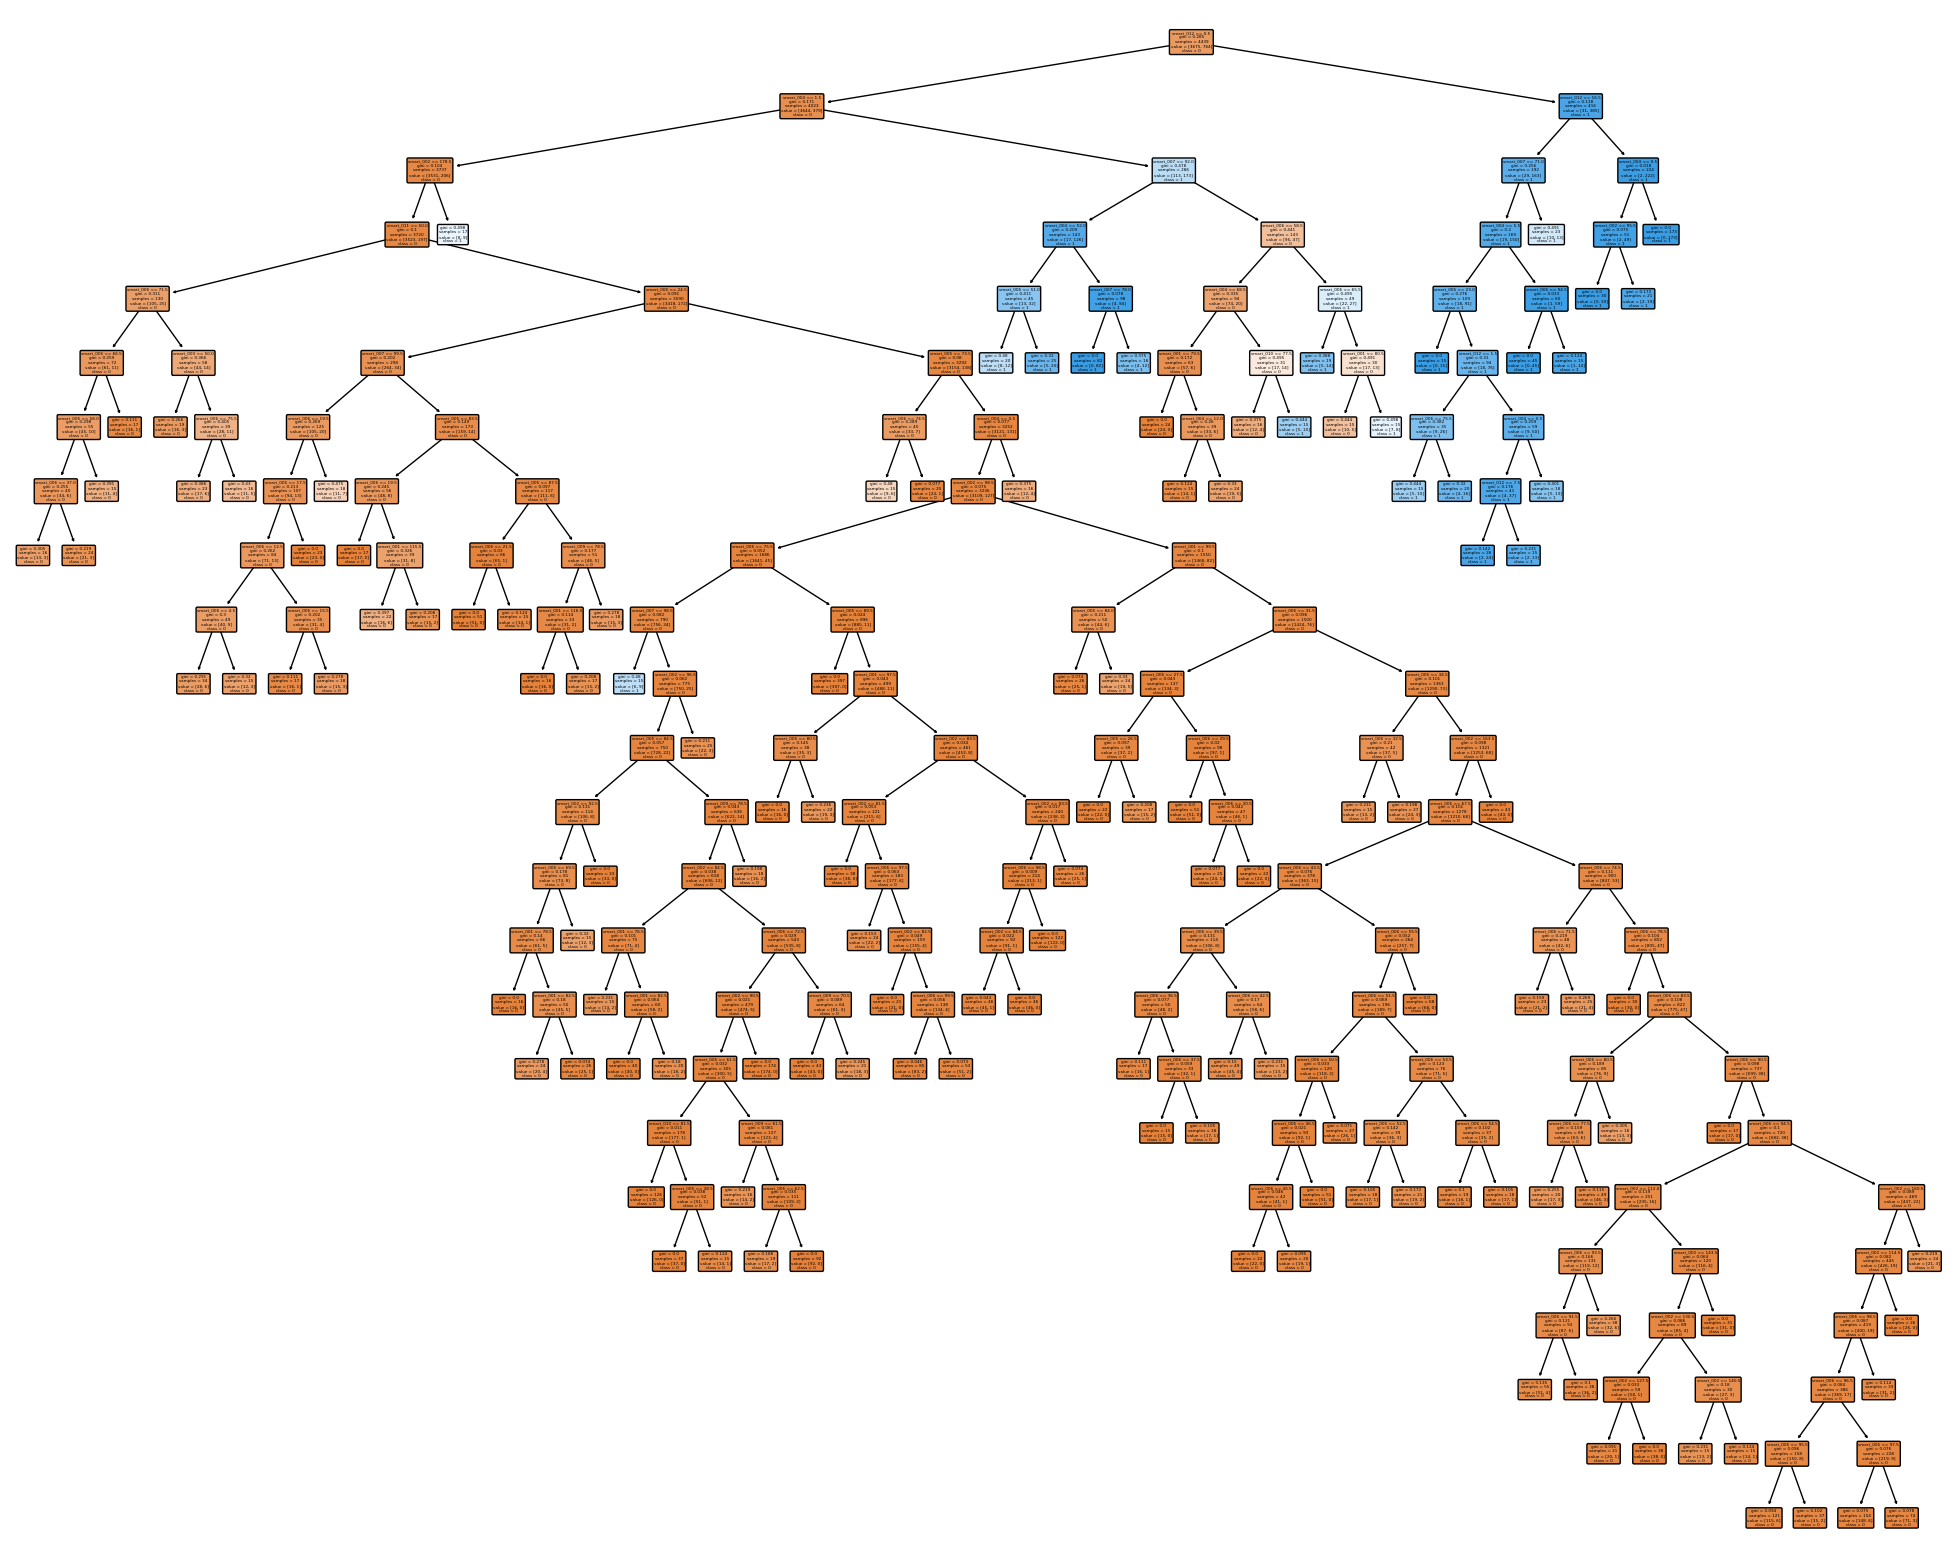

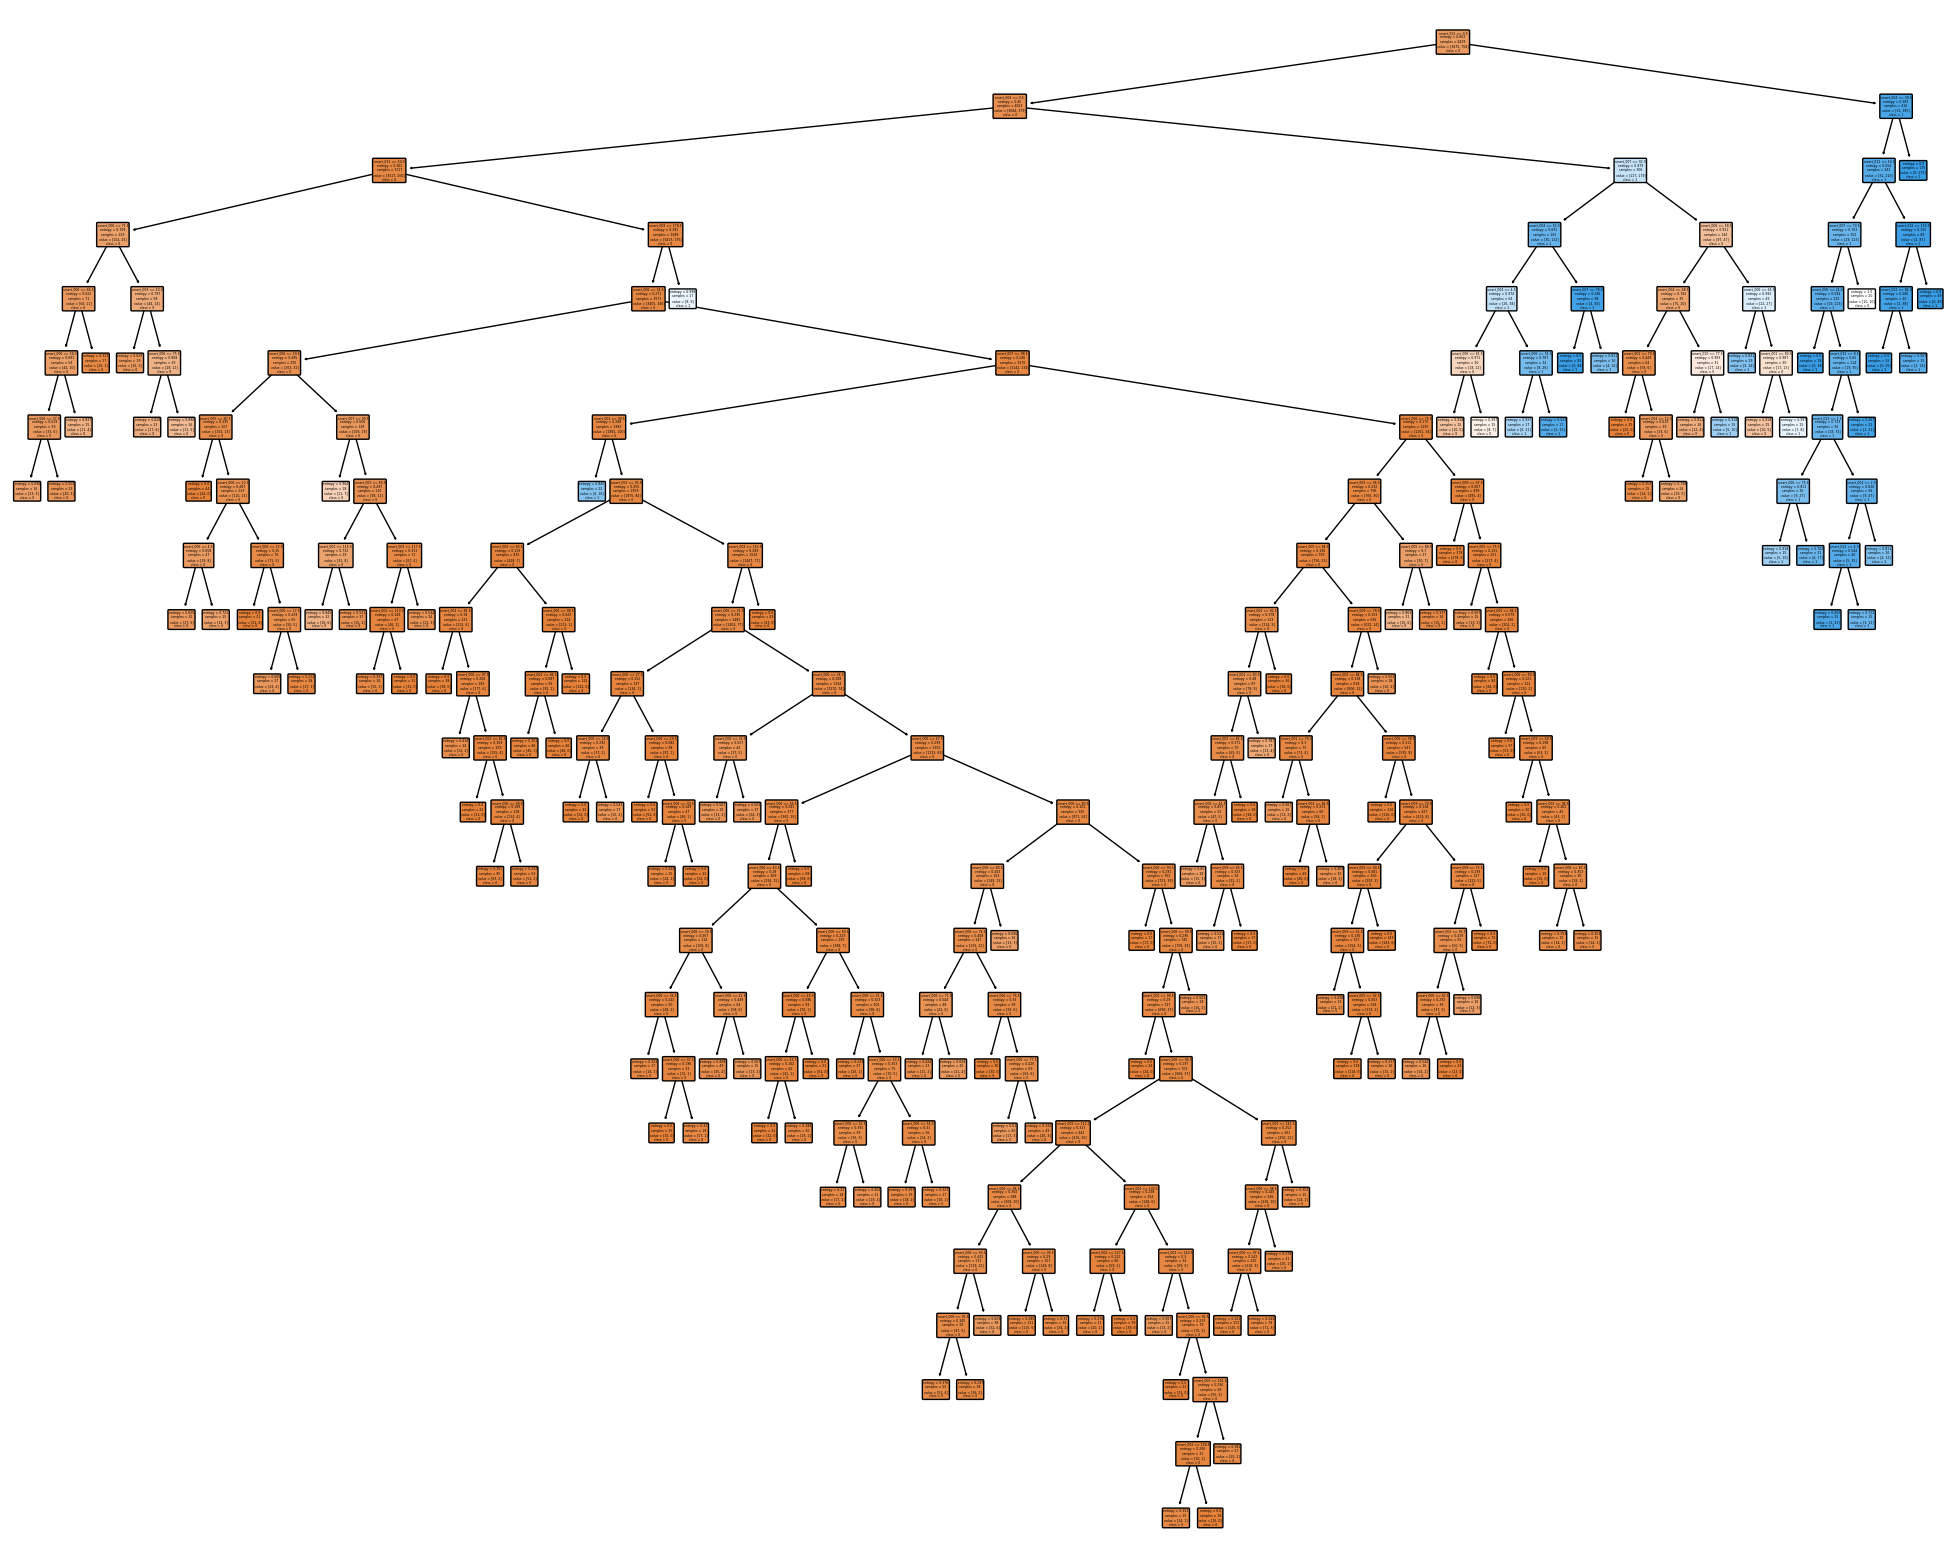

In [ ]:
if __name__ == "__main__":
    data = importdata()

    X, Y, X_train, X_test, y_train, y_test = splitdataset(data)

    clf_gini = train_using_gini(X_train, X_test, y_train)
    clf_entropy = train_using_entropy(X_train, X_test, y_train)

    # Visualizing the Decision Trees
    plot_decision_tree(clf_gini, [f"smart_{i:03}" for i in range(1, 255)], ['0', '1'])
    plot_decision_tree(clf_entropy, [f"smart_{i:03}" for i in range(1, 255)], ['0', '1'])


In [ ]:
# Operational Phase
print("Results Using Gini Index:")
y_pred_gini = prediction(X_test, clf_gini)
cal_accuracy(y_test, y_pred_gini)


Results Using Gini Index:
Predicted values:
[False False False ... False False False]
Confusion Matrix:  [[1554   56]
 [  75  218]]
Accuracy :  93.11613242249081
Report :                precision    recall  f1-score   support

       False       0.95      0.97      0.96      1610
        True       0.80      0.74      0.77       293

    accuracy                           0.93      1903
   macro avg       0.87      0.85      0.86      1903
weighted avg       0.93      0.93      0.93      1903

FP:  56.0
FN:  75.0
TP:  1554.0
TN:  218.0
TPR:  0.9539594843462247
TNR:  0.7956204379562044
PPV:  0.9652173913043478
NPV:  0.7440273037542662
FPR:  0.20437956204379562
FNR:  0.04604051565377532
FDR:  0.034782608695652174
ACC:  0.931161324224908


In [ ]:
print("Results Using Entropy:")
y_pred_entropy = prediction(X_test, clf_entropy)
cal_accuracy(y_test, y_pred_entropy)

Results Using Entropy:
Predicted values:
[False False False ... False False False]
Confusion Matrix:  [[1563   47]
 [  75  218]]
Accuracy :  93.58906988964793
Report :                precision    recall  f1-score   support

       False       0.95      0.97      0.96      1610
        True       0.82      0.74      0.78       293

    accuracy                           0.94      1903
   macro avg       0.89      0.86      0.87      1903
weighted avg       0.93      0.94      0.93      1903

FP:  47.0
FN:  75.0
TP:  1563.0
TN:  218.0
TPR:  0.9542124542124543
TNR:  0.8226415094339623
PPV:  0.970807453416149
NPV:  0.7440273037542662
FPR:  0.17735849056603772
FNR:  0.045787545787545784
FDR:  0.029192546583850933
ACC:  0.9358906988964792
